In [1]:
# Comando para obter a versão Python que está sendo utilizada
!python -V

Python 3.10.9


In [2]:
# Código para importar a biblioteca pandas
import pandas as pd

In [3]:
# Leitura do arquivo CSV com cotações de bitcoin e cria um DataFrame
dft_btc = pd.read_csv('btc_usd_historico.csv')

# Exibe o conteúdo do DataFrame
print(dft_btc)

            Data    Último  Abertura    Máxima    Mínima     Vol.    Var%
0     13.06.2023  25.929,4  25.906,9  26.428,9  25.726,4   56,24K   0,09%
1     12.06.2023  25.906,8  25.927,9  26.080,7  25.635,0   40,75K  -0,08%
2     11.06.2023  25.928,4  25.843,3  26.190,1  25.660,8   39,20K   0,33%
3     10.06.2023  25.844,0  26.479,3  26.525,1  25.468,3   83,57K  -2,40%
4     09.06.2023  26.479,3  26.501,1  26.773,9  26.326,7   38,96K  -0,08%
...          ...       ...       ...       ...       ...      ...     ...
1255  05.01.2020   7.372,5   7.376,8   7.501,0   7.345,6  628,14K  -0,06%
1256  04.01.2020   7.376,8   7.345,1   7.433,1   7.291,4  523,91K   0,46%
1257  03.01.2020   7.343,1   6.967,1   7.402,9   6.884,1  936,29K   5,40%
1258  02.01.2020   6.967,0   7.199,7   7.209,6   6.901,4  632,78K  -3,23%
1259  01.01.2020   7.199,8   7.196,4   7.259,4   7.180,0  420,28K   0,05%

[1260 rows x 7 columns]


In [4]:
dft_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Data      1260 non-null   object
 1   Último    1260 non-null   object
 2   Abertura  1260 non-null   object
 3   Máxima    1260 non-null   object
 4   Mínima    1260 non-null   object
 5   Vol.      1260 non-null   object
 6   Var%      1260 non-null   object
dtypes: object(7)
memory usage: 69.0+ KB


In [5]:
dft_btc.describe()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
count,1260,1260,1260,1260,1260,1260,1260
unique,1260,1257,1256,1254,1260,1227,773
top,13.06.2023,"21.365,2","16.831,8","40.599,0","25.726,4","1,05M","0,72%"
freq,1,2,2,2,1,4,7


In [6]:
dft_btc.isnull().sum()

Data        0
Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        0
Var%        0
dtype: int64

In [7]:
# Metodos para converter a string para tipo float dentro do df
def RetornarFloatParam(lista, param):
    nova_lista = [float(elemento.replace(param, "").replace(",", ".")) for elemento in lista]
    return nova_lista

def RetornarFloat(lista):
    return RetornarFloatParam(lista,".")

def RetornarPercentualFloat(lista):
    return RetornarFloatParam(lista,"%")

def RetornarVolFloat(lista):
    return  RetornarFloatParam(lista,"K")

# Metodo auxiliar para identificação do parametro
def Multiplicador(case):
    if case=='K': 
        return 1000
    if case=='M':
        return 1000000
    return 1

def TratarVolume(lista):    
    nova_lista = [float(elemento[:-1].replace(",", "."))*Multiplicador(elemento[-1]) for elemento in lista]
    return nova_lista

In [8]:
dft_btc['Último']= RetornarFloat(dft_btc['Último'])
dft_btc['Abertura']= RetornarFloat(dft_btc['Abertura'])
dft_btc['Máxima']= RetornarFloat(dft_btc['Máxima'])
dft_btc['Mínima']= RetornarFloat(dft_btc['Mínima'])
dft_btc['Var%']= RetornarPercentualFloat(dft_btc['Var%'])
dft_btc['Vol.']= TratarVolume(dft_btc['Vol.'])

# Converter coluna data para o tipo datetime
dft_btc['Data'] = pd.to_datetime(dft_btc['Data'], format='%d.%m.%Y')

In [9]:
dft_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      1260 non-null   datetime64[ns]
 1   Último    1260 non-null   float64       
 2   Abertura  1260 non-null   float64       
 3   Máxima    1260 non-null   float64       
 4   Mínima    1260 non-null   float64       
 5   Vol.      1260 non-null   float64       
 6   Var%      1260 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 69.0 KB


In [10]:
# Leitura do arquivo CSV com cotações de ethereum e cria um DataFrame
dtf_Eth = pd.read_csv('eth_usd_historico.csv')

# Exibe o conteúdo do DataFrame
print(dtf_Eth)

            Data    Último  Abertura    Máxima    Mínima     Vol.    Var%
0     13.06.2023  1.739,60  1.742,60  1.763,15  1.727,64  303,23K  -0,17%
1     12.06.2023  1.742,60  1.752,80  1.757,79  1.722,92  320,47K  -0,58%
2     11.06.2023  1.752,80  1.751,56  1.775,87  1.740,02  232,04K   0,07%
3     10.06.2023  1.751,56  1.840,41  1.844,23  1.719,16  696,59K  -4,83%
4     09.06.2023  1.840,41  1.845,68  1.854,72  1.828,66  215,71K  -0,29%
...          ...       ...       ...       ...       ...      ...     ...
1255  05.01.2020    135,59    134,32    138,33    134,32   12,19M   0,94%
1256  04.01.2020    134,33    134,30    135,57    132,76   11,16M   0,04%
1257  03.01.2020    134,27    127,19    134,86    126,05   15,67M   5,56%
1258  02.01.2020    127,19    130,75    130,77    126,74   11,45M  -2,72%
1259  01.01.2020    130,75    129,21    132,97    128,81   10,35M   1,19%

[1260 rows x 7 columns]


In [11]:
dtf_Eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Data      1260 non-null   object
 1   Último    1260 non-null   object
 2   Abertura  1260 non-null   object
 3   Máxima    1260 non-null   object
 4   Mínima    1260 non-null   object
 5   Vol.      1260 non-null   object
 6   Var%      1260 non-null   object
dtypes: object(7)
memory usage: 69.0+ KB


In [12]:
dtf_Eth.describe()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
count,1260,1260,1260,1260,1260,1260,1260
unique,1260,1255,1253,1255,1258,1056,841
top,13.06.2023,"212,00","212,00","1.915,15","377,63","1,94M","-1,53%"
freq,1,2,2,2,2,7,7


In [13]:
dtf_Eth.isnull().sum()

Data        0
Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        0
Var%        0
dtype: int64

In [14]:
dtf_Eth['Último']= RetornarFloat(dtf_Eth['Último'])
dtf_Eth['Abertura']= RetornarFloat(dtf_Eth['Abertura'])
dtf_Eth['Máxima']= RetornarFloat(dtf_Eth['Máxima'])
dtf_Eth['Mínima']= RetornarFloat(dtf_Eth['Mínima'])
dtf_Eth['Var%']= RetornarPercentualFloat(dtf_Eth['Var%'])
dtf_Eth['Vol.']= TratarVolume(dtf_Eth['Vol.'])

# Converter coluna data para o tipo datetime
dtf_Eth['Data'] = pd.to_datetime(dtf_Eth['Data'], format='%d.%m.%Y')

In [15]:
dtf_Eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      1260 non-null   datetime64[ns]
 1   Último    1260 non-null   float64       
 2   Abertura  1260 non-null   float64       
 3   Máxima    1260 non-null   float64       
 4   Mínima    1260 non-null   float64       
 5   Vol.      1260 non-null   float64       
 6   Var%      1260 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 69.0 KB


In [16]:
# Leitura do arquivo CSV com cotações do dolár e cria um DataFrame
dtf_usd = pd.read_csv('usd_brl_historico.csv')

# Exibe o conteúdo do DataFrame
print(dtf_usd)

           Date      Open      High       Low     Close  Adj Close  Volume
0    2020-01-01  4.016786  4.018200  4.016300  4.016786   4.016786       0
1    2020-01-02  4.016300  4.038700  4.000820  4.016300   4.016300       0
2    2020-01-03  4.023700  4.067005  4.021125  4.023400   4.023400       0
3    2020-01-06  4.057000  4.066200  4.044942  4.057000   4.057000       0
4    2020-01-07  4.060500  4.090600  4.043024  4.060400   4.060400       0
..          ...       ...       ...       ...       ...        ...     ...
896  2023-06-08  4.922400  4.925200  4.893570  4.922400   4.922400       0
897  2023-06-09  4.922100  4.925100  4.858300  4.922100   4.922100       0
898  2023-06-12  4.877900  4.895600  4.865636  4.877900   4.877900       0
899  2023-06-13  4.860600  4.875400  4.844746  4.860600   4.860600       0
900  2023-06-13  4.862400  4.862400  4.862200  4.862200   4.862200       0

[901 rows x 7 columns]


In [17]:
dtf_usd.info()
dtf_usd.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       901 non-null    object 
 1   Open       901 non-null    float64
 2   High       901 non-null    float64
 3   Low        901 non-null    float64
 4   Close      901 non-null    float64
 5   Adj Close  901 non-null    float64
 6   Volume     901 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 49.4+ KB


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

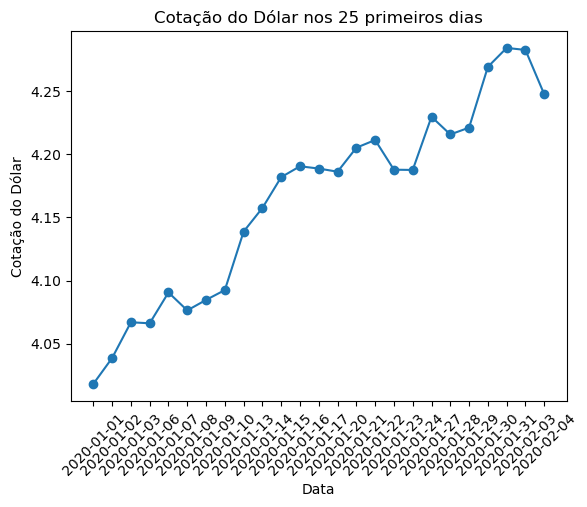

In [18]:
import matplotlib.pyplot as plt

dfplt = dtf_usd.head(25)

# Criar o gráfico de linha com marcadores
plt.plot(dfplt['Date'], dfplt['High'], marker='o')

# Adicionar rótulos e título
plt.xlabel('Data')
plt.ylabel('Cotação do Dólar')
plt.title('Cotação do Dólar nos 25 primeiros dias')

# Girar os rótulos do eixo x para facilitar a leitura
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

In [19]:
# Para evitar uso de registro duplicado, criamos um dataframe auxiliar
df = dtf_usd.head(900)

# Remover os campos que não serão utilizados
df = df.drop('Volume', axis=1)
df = df.drop('Adj Close', axis=1)

# Converte a coluna 'Date' para o tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

# Define a coluna 'Date' como o índice do dataframe
df = df.set_index('Date')

# Cria um novo dataframe com todos os dias entre a primeira e a última data
data_inicio = df.index.min()
data_fim = df.index.max()
df_completo = pd.DataFrame(index=pd.date_range(data_inicio, data_fim), columns=['Open','High','Low','Close'])

# Preenche o novo dataframe com as cotações disponíveis no dataframe original
df_completo.update(df)

# Preenche os dias ausentes com a última cotação disponível
df_completo['Close'] = df_completo['Close'].ffill()
df_completo['Open'] = df_completo['Open'].ffill()
df_completo['High'] = df_completo['High'].ffill()
df_completo['Low'] = df_completo['Low'].ffill()

# Reverte a coluna 'Date' de volta para uma coluna do dataframe
dtf_usd = df_completo.reset_index()
dtf_usd['Data']= dtf_usd['index']
dtf_usd = dtf_usd.drop('index', axis=1)

# Renomear colunas para melhor identificação
dtf_usd = dtf_usd.rename(columns={'Close': 'Dl_Fechamento'
                                  ,'Open': 'Dl_Abertura'
                                  ,'High': 'Dl_Maior'
                                  ,'Low': 'Dl_Menor'})   

In [20]:
# Renomear colunas para melhor identificação
dft_btc = dft_btc.rename(columns={'Último': 'Bt_Fechamento',
                                  'Abertura': 'Bt_Abertura',
                                  'Máxima': 'Bt_Maior',
                                  'Mínima': 'Bt_Menor',
                                  'Vol.': 'Bt_Volume',
                                  'Var%': 'Bt_Variacao'})

In [21]:
# Renomear colunas para melhor identificação
dtf_Eth = dtf_Eth.rename(columns={'Último': 'Et_Fechamento',
                                  'Abertura': 'Et_Abertura',
                                  'Máxima': 'Et_Maior',
                                  'Mínima': 'Et_Menor',
                                  'Vol.': 'Et_Volume',
                                  'Var%': 'Et_Variacao'})

In [22]:
# Colocar campo data com index para unir dataframes
dft_btc = dft_btc.set_index('Data')
dtf_usd = dtf_usd.set_index('Data')

# junção dataframes bitcoin e dolar
dt_bt_dl=dtf_usd.join(dft_btc)

dt_bt_dl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2020-01-01 to 2023-06-13
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Dl_Abertura    1260 non-null   float64
 1   Dl_Maior       1260 non-null   float64
 2   Dl_Menor       1260 non-null   float64
 3   Dl_Fechamento  1260 non-null   float64
 4   Bt_Fechamento  1260 non-null   float64
 5   Bt_Abertura    1260 non-null   float64
 6   Bt_Maior       1260 non-null   float64
 7   Bt_Menor       1260 non-null   float64
 8   Bt_Volume      1260 non-null   float64
 9   Bt_Variacao    1260 non-null   float64
dtypes: float64(10)
memory usage: 140.6 KB


In [23]:
dt_bt_dl.describe()

,Dl_Abertura,Dl_Maior,Dl_Menor,Dl_Fechamento,Bt_Fechamento,Bt_Abertura,Bt_Maior,Bt_Menor,Bt_Volume,Bt_Variacao
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03,1260.000000
mean,5.216376,5.253103,5.180077,5.216472,28395.520397,28380.967937,29100.141349,27585.579127,1.717056e+07,0.173127
std,0.328658,0.331123,0.324123,0.328694,16053.115090,16064.103230,16507.983169,15540.024652,8.815600e+07,3.722251
min,4.016300,4.018200,4.000820,4.016300,4826.000000,4815.200000,5369.300000,3869.500000,1.040000e+00,-39.180000
25%,5.080375,5.117297,5.048183,5.080400,15668.625000,15589.975000,15954.875000,15266.625000,7.568750e+04,-1.490000
50%,5.238400,5.276950,5.203200,5.240100,24446.600000,24420.500000,25123.950000,23963.500000,1.459450e+05,0.050000
75%,5.418650,5.454633,5.373522,5.418775,40879.100000,40879.950000,42248.950000,39604.125000,4.097225e+05,1.810000
max,5.886300,5.966484,5.882761,5.886400,67527.900000,67528.700000,68990.600000,66334.900000,7.528400e+08,19.410000


In [24]:
dt_bt_dl.isnull().sum()

Dl_Abertura      0
Dl_Maior         0
Dl_Menor         0
Dl_Fechamento    0
Bt_Fechamento    0
Bt_Abertura      0
Bt_Maior         0
Bt_Menor         0
Bt_Volume        0
Bt_Variacao      0
dtype: int64

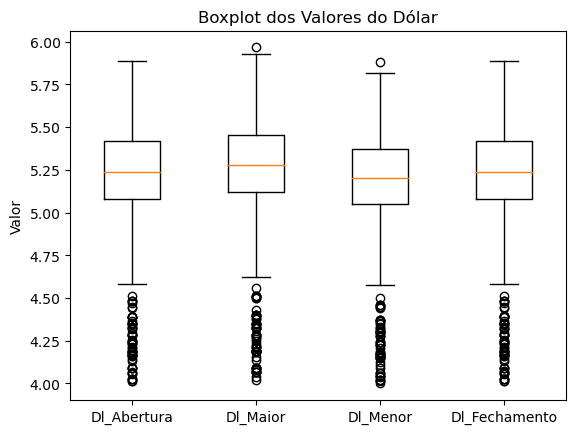

In [25]:
# Carregar o dataframe com as cotações de Dólar
df = dt_bt_dl

plt.boxplot([df['Dl_Abertura'], df['Dl_Maior'], df['Dl_Menor'], df['Dl_Fechamento']])

# Definir os rótulos dos eixos x e y
plt.xticks([1,2,3,4], ['Dl_Abertura','Dl_Maior','Dl_Menor','Dl_Fechamento'])
plt.ylabel('Valor')

# Definir um título para o gráfico
plt.title('Boxplot dos Valores do Dólar')

# Exibir o gráfico
plt.show()

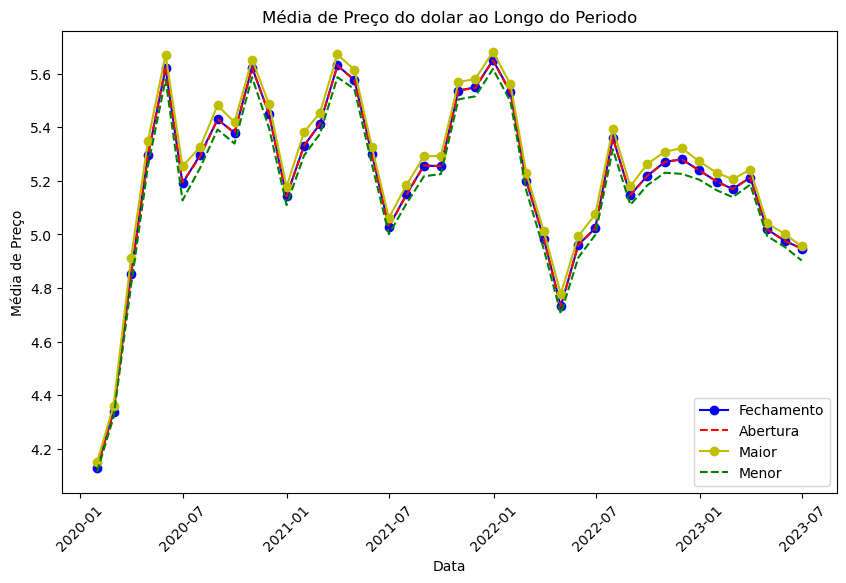

In [26]:
# Carregar o dataframe com as cotações de criptomoedas
df = dt_bt_dl

# Definir o tamanho do intervalo de média (por exemplo, 7 dias)
intervalo = '1M'

# Calcular a média dos preços em intervalos de tempo
df_media = df.resample(intervalo).mean()
df_media_outro_campo = df.resample(intervalo).mean()  

# Configurar o tamanho da figura
plt.figure(figsize=(10, 6))

# Plotar o gráfico de linhas da média dos preços
plt.plot(df_media.index, df_media['Dl_Fechamento'], marker='o', linestyle='-', color='b', label='Fechamento')
plt.plot(df_media.index, df_media_outro_campo['Dl_Abertura'], linestyle='--', color='r', label='Abertura')
plt.plot(df_media.index, df_media['Dl_Maior'], marker='o', linestyle='-', color='y', label='Maior')
plt.plot(df_media.index, df_media_outro_campo['Dl_Menor'], linestyle='--', color='g', label='Menor')

# Configurar os rótulos dos eixos
plt.xlabel('Data')
plt.ylabel('Média de Preço')

# Configurar o título do gráfico
plt.title('Média de Preço do dolar ao Longo do Periodo')
plt.legend(loc='lower right')
# Rotacionar os rótulos do eixo x para facilitar a leitura
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

In [27]:
# Armazenando o dataframe completo (desde 01/01/2020)
dt_bt_dl_completo = dt_bt_dl

# Filtrando os dados com inicio em 11-03-2020
dt_bt_dl = dt_bt_dl.loc['2020-03-11':]

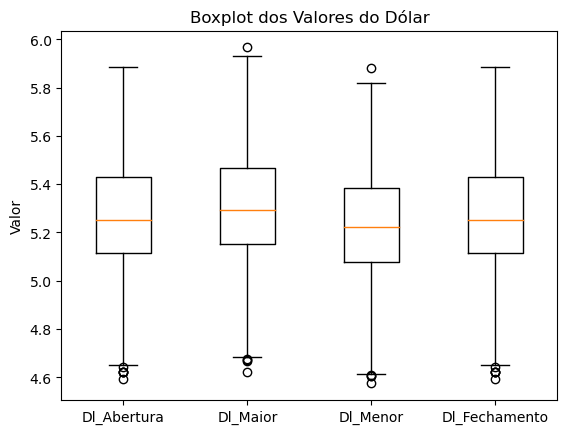

In [28]:
# Carregar o dataframe com as cotações
df = dt_bt_dl

plt.boxplot([df['Dl_Abertura'], df['Dl_Maior'], df['Dl_Menor'], df['Dl_Fechamento']])

# Definir os rótulos dos eixos x e y
plt.xticks([1,2,3,4], ['Dl_Abertura','Dl_Maior','Dl_Menor','Dl_Fechamento'])
plt.ylabel('Valor')

# Definir um título para o gráfico
plt.title('Boxplot dos Valores do Dólar')

# Exibir o gráfico
plt.show()

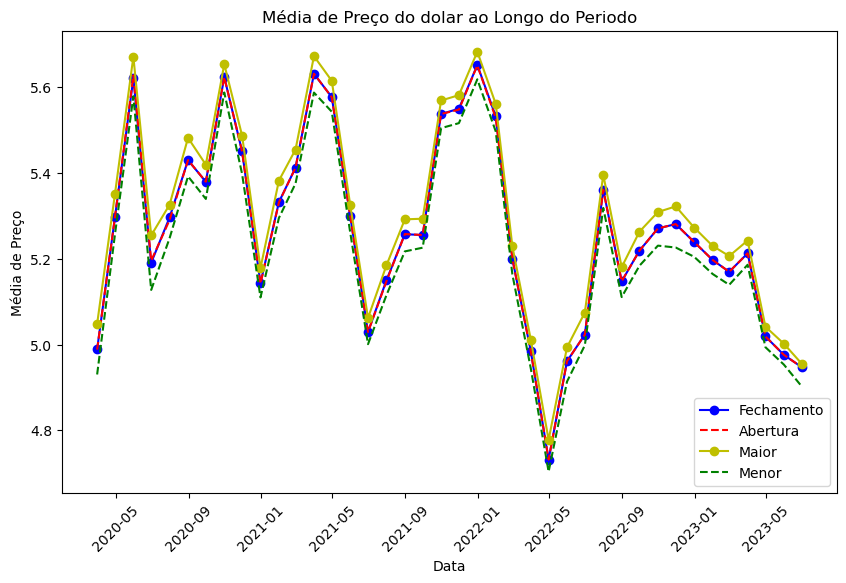

In [29]:
# Carregar o dataframe com as cotações
df = dt_bt_dl

# Definir o tamanho do intervalo de média (por exemplo, 7 dias)
intervalo = '1M'

# Calcular a média dos preços em intervalos de tempo
df_media = df.resample(intervalo).mean()
df_media_outro_campo = df.resample(intervalo).mean()  

# Configurar o tamanho da figura
plt.figure(figsize=(10, 6))

# Plotar o gráfico de linhas da média dos preços
plt.plot(df_media.index, df_media['Dl_Fechamento'], marker='o', linestyle='-', color='b', label='Fechamento')
plt.plot(df_media.index, df_media_outro_campo['Dl_Abertura'], linestyle='--', color='r', label='Abertura')
plt.plot(df_media.index, df_media['Dl_Maior'], marker='o', linestyle='-', color='y', label='Maior')
plt.plot(df_media.index, df_media_outro_campo['Dl_Menor'], linestyle='--', color='g', label='Menor')

# Configurar os rótulos dos eixos
plt.xlabel('Data')
plt.ylabel('Média de Preço')

# Configurar o título do gráfico
plt.title('Média de Preço do dolar ao Longo do Periodo')
plt.legend(loc='lower right')
# Rotacionar os rótulos do eixo x para facilitar a leitura
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

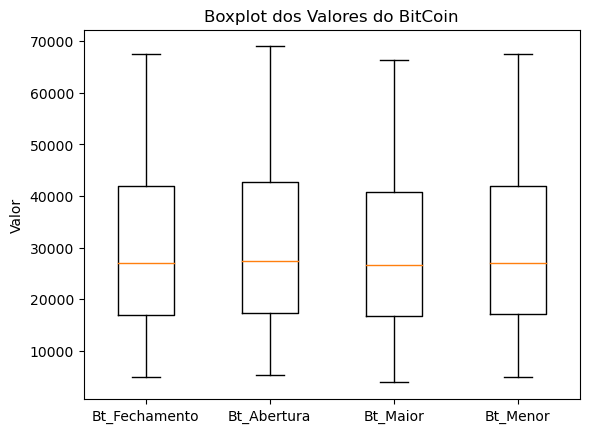

In [30]:
# Carregar o dataframe com as cotações de criptomoedas
df = dt_bt_dl

plt.boxplot([df['Bt_Abertura'], df['Bt_Maior'], df['Bt_Menor'], df['Bt_Fechamento']])

# Definir os rótulos dos eixos x e y
plt.xticks([1,2,3,4], ['Bt_Fechamento','Bt_Abertura','Bt_Maior','Bt_Menor'])
plt.ylabel('Valor')

# Definir um título para o gráfico
plt.title('Boxplot dos Valores do BitCoin')

# Exibir o gráfico
plt.show()

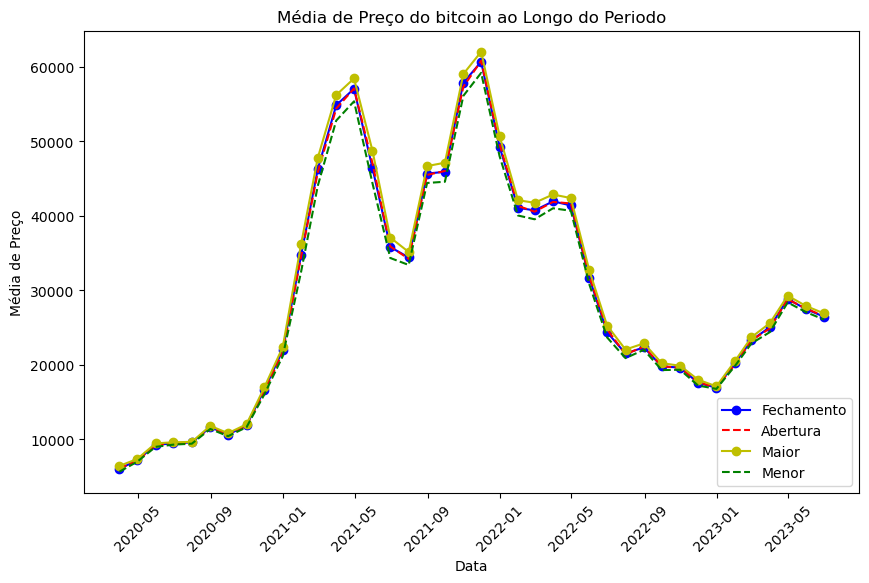

In [31]:
# Carregar o dataframe com as cotações de criptomoedas
df = dt_bt_dl

# Definir o tamanho do intervalo de média (por exemplo, 7 dias)
intervalo = '1M'

# Calcular a média dos preços em intervalos de tempo
df_media = df.resample(intervalo).mean()

# Configurar o tamanho da figura
plt.figure(figsize=(10, 6))

# Plotar o gráfico de linhas da média dos preços
plt.plot(df_media.index, df_media['Bt_Fechamento'], marker='o', linestyle='-', color='b', label='Fechamento')
plt.plot(df_media.index, df_media['Bt_Abertura'], linestyle='--', color='r', label='Abertura')
plt.plot(df_media.index, df_media['Bt_Maior'], marker='o', linestyle='-', color='y', label='Maior')
plt.plot(df_media.index, df_media['Bt_Menor'], linestyle='--', color='g', label='Menor')

# Configurar os rótulos dos eixos
plt.xlabel('Data')
plt.ylabel('Média de Preço')

# Configurar o título do gráfico
plt.title('Média de Preço do bitcoin ao Longo do Periodo')
plt.legend(loc='lower right')
# Rotacionar os rótulos do eixo x para facilitar a leitura
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

In [32]:
# Colocar campo data com index para unir dataframes
dtf_Eth = dtf_Eth.set_index('Data')

# junção dataframes ethereum e dolar
dt_et_dl=dtf_usd.join(dtf_Eth)

In [33]:
# Armazenando o dataframe completo (desde 01/01/2020)
dt_et_dl_completo = dt_et_dl

# Filtrando os dados com inicio em 11-03-2020
dt_et_dl = dt_et_dl.loc['2020-03-11':]

dt_et_dl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1190 entries, 2020-03-11 to 2023-06-13
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Dl_Abertura    1190 non-null   float64
 1   Dl_Maior       1190 non-null   float64
 2   Dl_Menor       1190 non-null   float64
 3   Dl_Fechamento  1190 non-null   float64
 4   Et_Fechamento  1190 non-null   float64
 5   Et_Abertura    1190 non-null   float64
 6   Et_Maior       1190 non-null   float64
 7   Et_Menor       1190 non-null   float64
 8   Et_Volume      1190 non-null   float64
 9   Et_Variacao    1190 non-null   float64
dtypes: float64(10)
memory usage: 102.3 KB


In [34]:
dt_et_dl.isnull().sum()

Dl_Abertura      0
Dl_Maior         0
Dl_Menor         0
Dl_Fechamento    0
Et_Fechamento    0
Et_Abertura      0
Et_Maior         0
Et_Menor         0
Et_Volume        0
Et_Variacao      0
dtype: int64

In [35]:
dt_et_dl.describe()

,Dl_Abertura,Dl_Maior,Dl_Menor,Dl_Fechamento,Et_Fechamento,Et_Abertura,Et_Maior,Et_Menor,Et_Volume,Et_Variacao
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1.190000e+03,1190.000000
mean,5.271578,5.308878,5.234166,5.271716,1780.315387,1779.064387,1834.967815,1716.595134,7.465102e+06,0.305437
std,0.240472,0.241201,0.238543,0.240367,1164.568893,1165.469538,1200.201204,1123.696091,5.241451e+07,4.905335
min,4.593800,4.621600,4.575500,4.593800,107.900000,107.870000,117.910000,88.500000,1.060000e+00,-44.550000
25%,5.116300,5.152200,5.075800,5.115650,824.617500,757.575000,842.567500,735.895000,5.652125e+05,-2.037500
50%,5.251950,5.291640,5.220878,5.252000,1669.650000,1667.660000,1719.555000,1626.105000,1.065000e+06,0.220000
75%,5.430925,5.466945,5.384829,5.430400,2587.345000,2587.510000,2676.760000,2490.552500,3.155000e+06,2.777500
max,5.886300,5.966484,5.882761,5.886400,4808.380000,4808.340000,4864.060000,4715.430000,9.918200e+08,25.960000


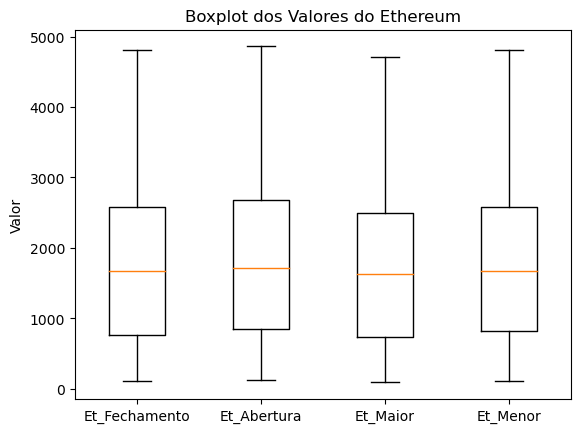

In [36]:
# Carregar o dataframe com as cotações de criptomoedas
df = dt_et_dl

plt.boxplot([df['Et_Abertura'], df['Et_Maior'], df['Et_Menor'], df['Et_Fechamento']])

# Definir os rótulos dos eixos x e y
plt.xticks([1,2,3,4], ['Et_Fechamento','Et_Abertura','Et_Maior','Et_Menor'])
plt.ylabel('Valor')

# Definir um título para o gráfico
plt.title('Boxplot dos Valores do Ethereum')

# Exibir o gráfico
plt.show()

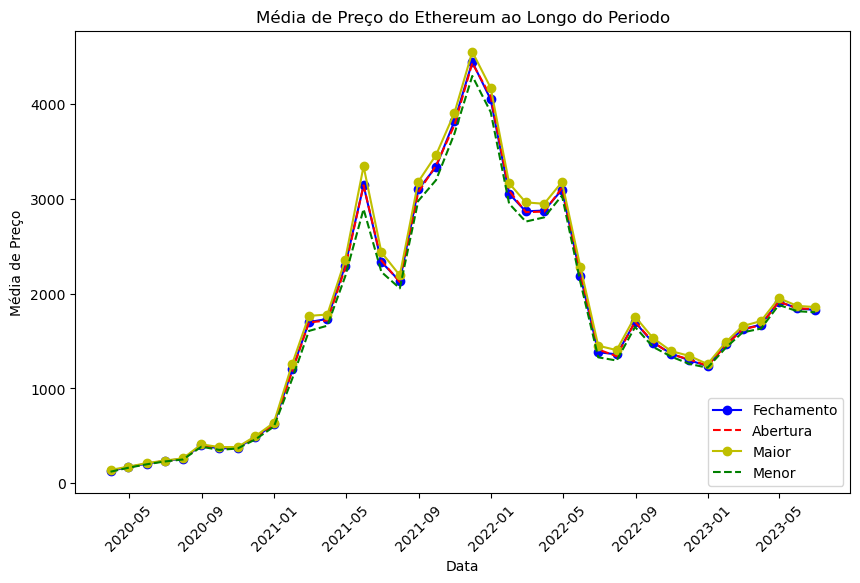

In [37]:
# Carregar o dataframe com as cotações de criptomoedas
df = dt_et_dl

# Definir o tamanho do intervalo de média
intervalo = '1M'

# Calcular a média dos preços em intervalos de tempo
df_media = df.resample(intervalo).mean()

# Configurar o tamanho da figura
plt.figure(figsize=(10, 6))

# Plotar o gráfico de linhas da média dos preços
plt.plot(df_media.index, df_media['Et_Fechamento'], marker='o', linestyle='-', color='b', label='Fechamento')
plt.plot(df_media.index, df_media['Et_Abertura'], linestyle='--', color='r', label='Abertura')
plt.plot(df_media.index, df_media['Et_Maior'], marker='o', linestyle='-', color='y', label='Maior')
plt.plot(df_media.index, df_media['Et_Menor'], linestyle='--', color='g', label='Menor')

# Configurar os rótulos dos eixos
plt.xlabel('Data')
plt.ylabel('Média de Preço')

# Configurar o título do gráfico
plt.title('Média de Preço do Ethereum ao Longo do Periodo')
plt.legend(loc='lower right')
# Rotacionar os rótulos do eixo x para facilitar a leitura
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

In [38]:
print(dt_bt_dl)

            Dl_Abertura  Dl_Maior  Dl_Menor  Dl_Fechamento  Bt_Fechamento  \
Data                                                                        
2020-03-11       4.6425    4.6831  4.615200         4.6421         7935.1   
2020-03-12       4.8134    5.0157  4.810665         4.8138         4826.0   
2020-03-13       4.7904    4.7914  4.648300         4.7902         5584.3   
2020-03-14       4.7904    4.7914  4.648300         4.7902         5182.7   
2020-03-15       4.7904    4.7914  4.648300         4.7902         5366.3   
...                 ...       ...       ...            ...            ...   
2023-06-09       4.9221    4.9251  4.858300         4.9221        26479.3   
2023-06-10       4.9221    4.9251  4.858300         4.9221        25844.0   
2023-06-11       4.9221    4.9251  4.858300         4.9221        25928.4   
2023-06-12       4.8779    4.8956  4.865636         4.8779        25906.8   
2023-06-13       4.8606    4.8754  4.844746         4.8606        25929.4   

In [39]:
# Utilizando o dataframe com as cotações desde inicio 01/01/2020
df = dt_bt_dl_completo

# valor do bitcoin em reais
df['Btr_Fechamento'] = df['Bt_Fechamento'] * df['Dl_Fechamento']

# Calcule as métricas para dolar
df['Dl_Amplitude'] = df['Dl_Maior'] - df['Dl_Menor']  # Amplitude = Maior Valor - Menor Valor
df['Dl_Variacao'] = df['Dl_Fechamento'] - df['Dl_Abertura']  

# Calcule as métricas para bitcoin
df['Bt_Amplitude'] = df['Bt_Maior'] - df['Bt_Menor']  # Amplitude = Maior Valor - Menor Valor
df['Bt_Variacao'] = df['Bt_Fechamento'] - df['Bt_Abertura']

# Cálculo da média móvel simples de 50,100,200 dias do bitcoin em dolar
df['Bt_SMA 50'] = df['Bt_Fechamento'].rolling(window=50, min_periods=1).mean()
df['Bt_SMA 100'] = df['Bt_Fechamento'].rolling(window=100, min_periods=1).mean()
df['Bt_SMA 200'] = df['Bt_Fechamento'].rolling(window=200, min_periods=1).mean()

# Exemplo de cálculo do RSI de 14 dias
delta = df['Bt_Fechamento'].diff()  # Diferença entre os preços de fechamento consecutivos
gain = delta.where(delta > 0, 0)  # Ganho (diferença positiva)
loss = -delta.where(delta < 0, 0)  # Perda (diferença negativa)

average_gain = gain.rolling(window=14, min_periods=1).mean()  # Média móvel de ganhos de 14 dias
average_loss = loss.rolling(window=14, min_periods=1).mean()  # Média móvel de perdas de 14 dias
rs = average_gain / average_loss  # Rácio de ganhos/perdas
rsi = 100 - (100 / (1 + rs))  # RSI
df['rsi'] = rsi

# Cálculo da MACD
short_ema = df['Bt_Fechamento'].ewm(span=12, min_periods=1).mean()  # EMA de 12 dias
long_ema = df['Bt_Fechamento'].ewm(span=26, min_periods=1).mean()  # EMA de 26 dias
df['MACD'] = short_ema - long_ema  # MACD

# Cálculo das Bandas de Bollinger
df['SMA'] = df['Bt_Fechamento'].rolling(window=20, min_periods=1).mean()
df['Std'] = df['Bt_Fechamento'].rolling(window=20, min_periods=1).std()

# Tratamento do valor NAN do primeiro registro, usando proximo disponivel 
df['Std'].fillna(df['Std'].iloc[20 - 1], inplace=True)

df['BandaBollingerAlta'] = df['SMA'] + 2 * df['Std']
df['BandaBollingerBaixa'] = df['SMA'] - 2 * df['Std']

# Calcular os níveis de Fibonacci para cada dia
highest_high = df['Bt_Maior'].rolling(window=20, min_periods=1).max()
lowest_low = df['Bt_Menor'].rolling(window=20, min_periods=1).min()
range_high_low = highest_high - lowest_low

# Níveis de Retração de Fibonacci
fibonacci_levels = [0, 0.236, 0.382, 0.5, 0.618, 0.786, 1]
for level in fibonacci_levels:
    df['Fibonacci Level ' + str(level)] = highest_high - level * range_high_low

# Definir o percentual de valorização e o número de dias a serem considerados
percentual_valorizacao = 0.10  
numero_dias = 7

# Calcular a valorização percentual em relação ao número de dias anteriores
df['Valorizacao'] = df['Bt_Fechamento'].pct_change(periods=numero_dias)

# Criar campo que indica se a moeda valorizou o percentual desejado nos dias futuros
df['Valorizou'] = (df['Valorizacao'].shift(-numero_dias) > percentual_valorizacao) & (df['Valorizacao'] > 0)
    
dt_bt_dl = df.loc['2020-03-11':]

# Filtrando os dados com inicio em 11-03-2020
print(dt_bt_dl)

            Dl_Abertura  Dl_Maior  Dl_Menor  Dl_Fechamento  Bt_Fechamento  \
Data                                                                        
2020-03-11       4.6425    4.6831  4.615200         4.6421         7935.1   
2020-03-12       4.8134    5.0157  4.810665         4.8138         4826.0   
2020-03-13       4.7904    4.7914  4.648300         4.7902         5584.3   
2020-03-14       4.7904    4.7914  4.648300         4.7902         5182.7   
2020-03-15       4.7904    4.7914  4.648300         4.7902         5366.3   
...                 ...       ...       ...            ...            ...   
2023-06-09       4.9221    4.9251  4.858300         4.9221        26479.3   
2023-06-10       4.9221    4.9251  4.858300         4.9221        25844.0   
2023-06-11       4.9221    4.9251  4.858300         4.9221        25928.4   
2023-06-12       4.8779    4.8956  4.865636         4.8779        25906.8   
2023-06-13       4.8606    4.8754  4.844746         4.8606        25929.4   

In [40]:
df[df['Valorizou'] == True].count().sum()

3680

In [41]:
# Utilizando o dataframe ethereum com as cotações desde inicio 01/01/2020
df = dt_et_dl_completo

# valor do bitcoin em reais
df['Etr_Fechamento'] = df['Et_Fechamento'] * df['Dl_Fechamento']

# Calcule as métricas para dolar
df['Dl_Amplitude'] = df['Dl_Maior'] - df['Dl_Menor']  # Amplitude = Maior Valor - Menor Valor
df['Dl_Variacao'] = df['Dl_Fechamento'] - df['Dl_Abertura']  

# Calcule as métricas para bitcoin
df['Et_Amplitude'] = df['Et_Maior'] - df['Et_Menor']  # Amplitude = Maior Valor - Menor Valor
df['Et_Variacao'] = df['Et_Fechamento'] - df['Et_Abertura']

# Cálculo da média móvel simples de 50,100,200 dias do bitcoin em dolar
df['Et_SMA 50'] = df['Et_Fechamento'].rolling(window=50, min_periods=1).mean()
df['Et_SMA 100'] = df['Et_Fechamento'].rolling(window=100, min_periods=1).mean()
df['Et_SMA 200'] = df['Et_Fechamento'].rolling(window=200, min_periods=1).mean()

# Exemplo de cálculo do RSI de 14 dias
delta = df['Et_Fechamento'].diff()  # Diferença entre os preços de fechamento consecutivos
gain = delta.where(delta > 0, 0)  # Ganho (diferença positiva)
loss = -delta.where(delta < 0, 0)  # Perda (diferença negativa)

average_gain = gain.rolling(window=14, min_periods=1).mean()  # Média móvel de ganhos de 14 dias
average_loss = loss.rolling(window=14, min_periods=1).mean()  # Média móvel de perdas de 14 dias
rs = average_gain / average_loss  # Rácio de ganhos/perdas
rsi = 100 - (100 / (1 + rs))  # RSI
df['rsi'] = rsi

# Cálculo da MACD
short_ema = df['Et_Fechamento'].ewm(span=12, min_periods=1).mean()  # EMA de 12 dias
long_ema = df['Et_Fechamento'].ewm(span=26, min_periods=1).mean()  # EMA de 26 dias
df['MACD'] = short_ema - long_ema  # MACD

# Cálculo das Bandas de Bollinger
df['SMA'] = df['Et_Fechamento'].rolling(window=20, min_periods=1).mean()
df['Std'] = df['Et_Fechamento'].rolling(window=20, min_periods=1).std()

# Tratamento do valor NAN do primeiro registro, usando proximo disponivel 
df['Std'].fillna(df['Std'].iloc[20 - 1], inplace=True)

df['BandaBollingerAlta'] = df['SMA'] + 2 * df['Std']
df['BandaBollingerBaixa'] = df['SMA'] - 2 * df['Std']

# Calcular os níveis de Fibonacci para cada dia
highest_high = df['Et_Maior'].rolling(window=20, min_periods=1).max()
lowest_low = df['Et_Menor'].rolling(window=20, min_periods=1).min()
range_high_low = highest_high - lowest_low

# Níveis de Retração de Fibonacci
fibonacci_levels = [0, 0.236, 0.382, 0.5, 0.618, 0.786, 1]
for level in fibonacci_levels:
    df['Fibonacci Level ' + str(level)] = highest_high - level * range_high_low

# Definir o percentual de valorização e o número de dias a serem considerados
percentual_valorizacao = 0.10  
numero_dias = 7

# Calcular a valorização percentual em relação ao número de dias anteriores
df['Valorizacao'] = df['Et_Fechamento'].pct_change(periods=numero_dias)

# Criar campo que indica se a moeda valorizou o percentual desejado nos dias futuros
df['Valorizou'] = (df['Valorizacao'].shift(-numero_dias) > percentual_valorizacao) & (df['Valorizacao'] > 0)
    
dt_et_dl = df.loc['2020-03-11':]

# Filtrando os dados com inicio em 11-03-2020
print(dt_et_dl)

            Dl_Abertura  Dl_Maior  Dl_Menor  Dl_Fechamento  Et_Fechamento  \
Data                                                                        
2020-03-11       4.6425    4.6831  4.615200         4.6421         194.58   
2020-03-12       4.8134    5.0157  4.810665         4.8138         107.90   
2020-03-13       4.7904    4.7914  4.648300         4.7902         133.99   
2020-03-14       4.7904    4.7914  4.648300         4.7902         122.69   
2020-03-15       4.7904    4.7914  4.648300         4.7902         124.35   
...                 ...       ...       ...            ...            ...   
2023-06-09       4.9221    4.9251  4.858300         4.9221        1840.41   
2023-06-10       4.9221    4.9251  4.858300         4.9221        1751.56   
2023-06-11       4.9221    4.9251  4.858300         4.9221        1752.80   
2023-06-12       4.8779    4.8956  4.865636         4.8779        1742.60   
2023-06-13       4.8606    4.8754  4.844746         4.8606        1739.60   

In [42]:
df[df['Valorizou'] == True].count().sum()

5152

In [43]:
dt_bt_dl.isnull().sum()

Dl_Abertura              0
Dl_Maior                 0
Dl_Menor                 0
Dl_Fechamento            0
Bt_Fechamento            0
Bt_Abertura              0
Bt_Maior                 0
Bt_Menor                 0
Bt_Volume                0
Bt_Variacao              0
Btr_Fechamento           0
Dl_Amplitude             0
Dl_Variacao              0
Bt_Amplitude             0
Bt_SMA 50                0
Bt_SMA 100               0
Bt_SMA 200               0
rsi                      0
MACD                     0
SMA                      0
Std                      0
BandaBollingerAlta       0
BandaBollingerBaixa      0
Fibonacci Level 0        0
Fibonacci Level 0.236    0
Fibonacci Level 0.382    0
Fibonacci Level 0.5      0
Fibonacci Level 0.618    0
Fibonacci Level 0.786    0
Fibonacci Level 1        0
Valorizacao              0
Valorizou                0
dtype: int64

In [44]:
from sklearn.ensemble import ExtraTreesRegressor

# Carregar os dados da base de dados históricos
dados = dt_bt_dl

# Separar as variáveis de entrada (X) e a variável de saída (y)
X = dados.drop('Valorizou', axis=1)  # Valorizou é coluna target
y = dados['Valorizou']

# Criação do modelo de árvore de decisão para estimar a importância das variáveis
modelo = ExtraTreesRegressor()
modelo.fit(X, y)

# Extraindo a importância das variáveis
importancias = modelo.feature_importances_

# Criando um DataFrame para visualização das importâncias
importancias_df = pd.DataFrame({'Variável': X.columns, 'Importância': importancias})

# Ordenar as variáveis por importância descendente
importancias_df = importancias_df.sort_values('Importância', ascending=False)

# Exibir o resultado
print(importancias_df)

                 Variável  Importância
30            Valorizacao     0.085879
17                    rsi     0.072736
16             Bt_SMA 200     0.070149
15             Bt_SMA 100     0.054692
20                    Std     0.046775
14              Bt_SMA 50     0.041387
11           Dl_Amplitude     0.041073
18                   MACD     0.035226
1                Dl_Maior     0.029781
2                Dl_Menor     0.029305
8               Bt_Volume     0.028623
23      Fibonacci Level 0     0.027572
12            Dl_Variacao     0.026547
3           Dl_Fechamento     0.026470
21     BandaBollingerAlta     0.026148
6                Bt_Maior     0.026000
10         Btr_Fechamento     0.025799
0             Dl_Abertura     0.025688
24  Fibonacci Level 0.236     0.025526
4           Bt_Fechamento     0.025095
28  Fibonacci Level 0.786     0.024907
29      Fibonacci Level 1     0.024349
13           Bt_Amplitude     0.023234
27  Fibonacci Level 0.618     0.022731
19                    SMA

In [45]:
from sklearn.ensemble import ExtraTreesRegressor

# Carregar os dados da base de dados históricos
dados = dt_et_dl

# Separar as variáveis de entrada (X) e a variável de saída (y)
X = dados.drop('Valorizou', axis=1)  # Valorizou é coluna target
y = dados['Valorizou']

# Criação do modelo de árvore de decisão para estimar a importância das variáveis
modelo = ExtraTreesRegressor()
modelo.fit(X, y)

# Extraindo a importância das variáveis
importancias = modelo.feature_importances_

# Criando um DataFrame para visualização das importâncias
importancias_df = pd.DataFrame({'Variável': X.columns, 'Importância': importancias})

# Ordenar as variáveis por importância descendente
importancias_df = importancias_df.sort_values('Importância', ascending=False)

# Exibir o resultado
print(importancias_df)

                 Variável  Importância
30            Valorizacao     0.111434
17                    rsi     0.054412
14              Et_SMA 50     0.038733
20                    Std     0.035946
1                Dl_Maior     0.035053
18                   MACD     0.033846
8               Et_Volume     0.033001
2                Dl_Menor     0.032313
4           Et_Fechamento     0.031657
23      Fibonacci Level 0     0.031514
9             Et_Variacao     0.031474
21     BandaBollingerAlta     0.031375
10         Etr_Fechamento     0.030452
13           Et_Amplitude     0.030449
6                Et_Maior     0.030138
15             Et_SMA 100     0.030103
3           Dl_Fechamento     0.030077
11           Dl_Amplitude     0.029034
16             Et_SMA 200     0.028967
27  Fibonacci Level 0.618     0.028217
5             Et_Abertura     0.027669
0             Dl_Abertura     0.026986
19                    SMA     0.025838
24  Fibonacci Level 0.236     0.025124
7                Et_Menor

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# atribuir nossa base de cotaçoes de dolar
df = dt_bt_dl

# Separar as variáveis independentes (X) e a variável dependente (y)
X = df[['Bt_SMA 200', 'rsi', 'Bt_SMA 100', 'Std', 'Dl_Amplitude', 'Bt_SMA 50', 'MACD','Fibonacci Level 0',
        'Dl_Menor', 'BandaBollingerAlta', 'Bt_Volume', 'Fibonacci Level 1', 'Dl_Maior']]
y = df['Valorizou']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)

# Avaliar desempenho usando as métricas de erro quadrático médio (MSE) e coeficiente de determinação (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erro quadrático médio (MSE):", mse)
print("Coeficiente de determinação (R²):", r2)


Erro quadrático médio (MSE): 0.08722714468588269
Coeficiente de determinação (R²): 0.10361132373237691


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# atribuir nossa base de cotaçoes de ethereum
df = dt_et_dl

# Separar as variáveis independentes (X) e a variável dependente (y)
X = df[['rsi', 'Et_SMA 50', 'MACD', 'Et_SMA 100', 'Et_Fechamento', 'Et_SMA 200', 'Std', 'Dl_Maior', 
'Et_Variacao', 'Fibonacci Level 0', 'Etr_Fechamento', 'Dl_Amplitude', 'Dl_Menor']]
y = df['Valorizou']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo usando as métricas de erro quadrático médio (MSE) e coeficiente de determinação (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erro quadrático médio (MSE):", mse)
print("Coeficiente de determinação (R²):", r2)


Erro quadrático médio (MSE): 0.11375816714086462
Coeficiente de determinação (R²): 0.02249429315425744


In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

# Carregando os dados
df = dt_bt_dl

# Separar as variáveis independentes (X) e a variável dependente (y)
X = df[['Bt_SMA 200', 'rsi', 'Bt_SMA 100', 'Std', 'Dl_Amplitude', 'Bt_SMA 50', 'MACD','Fibonacci Level 0',
        'Dl_Menor', 'BandaBollingerAlta', 'Bt_Volume', 'Fibonacci Level 1', 'Dl_Maior']]
y = df['Valorizou']

# Divisão dos dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criação e treinamento do modelo de Árvore de Decisão
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Previsões com o conjunto de teste
predictions = model.predict(X_test)

# Avaliação do desempenho do modelo
accuracy = accuracy_score(y_test, predictions)
print(f"Acurácia: {accuracy}")

# Matriz de Confusão
cm = confusion_matrix(y_test, predictions)
print("Matriz de Confusão:")
print(cm)

# Precisão
precision = precision_score(y_test, predictions)
print(f"Precisão: {precision}")

# Recall
recall = recall_score(y_test, predictions)
print(f"Recall: {recall}")

# F1-Score
f1 = f1_score(y_test, predictions)
print(f"F1-Score: {f1}")

# AUC-ROC
auc_roc = roc_auc_score(y_test, predictions)
print(f"AUC-ROC: {auc_roc}")

Acurácia: 0.9215686274509803
Matriz de Confusão:
[[302  16]
 [ 12  27]]
Precisão: 0.627906976744186
Recall: 0.6923076923076923
F1-Score: 0.6585365853658537
AUC-ROC: 0.8209966134494436


In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

# Carregando os dados
df = dt_et_dl

# Separar as variáveis independentes (X) e a variável dependente (y)
X = df[['rsi', 'Et_SMA 50', 'MACD', 'Et_SMA 100', 'Et_Fechamento', 'Et_SMA 200', 'Std', 'Dl_Maior', 
'Et_Variacao', 'Fibonacci Level 0', 'Etr_Fechamento', 'Dl_Amplitude', 'Dl_Menor']]
y = df['Valorizou']

# Divisão dos dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criação e treinamento do modelo de Árvore de Decisão
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Previsões com o conjunto de teste
predictions = model.predict(X_test)

# Avaliação do desempenho do modelo
accuracy = accuracy_score(y_test, predictions)
print(f"Acurácia: {accuracy}")

# Matriz de Confusão
cm = confusion_matrix(y_test, predictions)
print("Matriz de Confusão:")
print(cm)

# Precisão
precision = precision_score(y_test, predictions)
print(f"Precisão: {precision}")

# Recall
recall = recall_score(y_test, predictions)
print(f"Recall: {recall}")

# F1-Score
f1 = f1_score(y_test, predictions)
print(f"F1-Score: {f1}")

# AUC-ROC
auc_roc = roc_auc_score(y_test, predictions)
print(f"AUC-ROC: {auc_roc}")

Acurácia: 0.8683473389355743
Matriz de Confusão:
[[292  17]
 [ 30  18]]
Precisão: 0.5142857142857142
Recall: 0.375
F1-Score: 0.43373493975903615
AUC-ROC: 0.6599919093851132


In [67]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Carregando os dados,ou seja, atribuir nossa base de cotaçoes de bitcoin
df = dt_bt_dl

# Separar as variáveis independentes (X) e a variável dependente (y)
X = df[['Bt_SMA 200', 'rsi', 'Bt_SMA 100', 'Std', 'Dl_Amplitude', 'Bt_SMA 50', 'MACD','Fibonacci Level 0',
        'Dl_Menor', 'BandaBollingerAlta', 'Bt_Volume', 'Fibonacci Level 1', 'Dl_Maior']]
y = df['Valorizou']

# Divisão dos dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criação e treinamento do modelo Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Previsões com o conjunto de teste
predictions = model.predict(X_test)

print(f"Métricas obtidas da aplicação do modelo sobre")
print(f"as informações das cotações do Bitcoin")
print(f"")

# Avaliação do desempenho do modelo
accuracy = accuracy_score(y_test, predictions)
print(f"Acurácia: {accuracy}")

# Matriz de Confusão
cm = confusion_matrix(y_test, predictions)
print("Matriz de Confusão:")
print(cm)

# Precisão
precision = precision_score(y_test, predictions)
print(f"Precisão: {precision}")

# Recall
recall = recall_score(y_test, predictions)
print(f"Recall: {recall}")

# F1-Score
f1 = f1_score(y_test, predictions)
print(f"F1-Score: {f1}")

# AUC-ROC
auc_roc = roc_auc_score(y_test, predictions)
print(f"AUC-ROC: {auc_roc}")

Métricas obtidas da aplicação do modelo sobre
as informações das cotações do Bitcoin

Acurácia: 0.9495798319327731
Matriz de Confusão:
[[311   7]
 [ 11  28]]
Precisão: 0.8
Recall: 0.717948717948718
F1-Score: 0.7567567567567569
AUC-ROC: 0.847968069666183


In [68]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Carregando os dados,ou seja, atribuir nossa base de cotaçoes de etereum
df = dt_et_dl

# Separar as variáveis independentes (X) e a variável dependente (y)
X = df[['rsi', 'Et_SMA 50', 'MACD', 'Et_SMA 100', 'Et_Fechamento', 'Et_SMA 200', 'Std', 'Dl_Maior', 
'Et_Variacao', 'Fibonacci Level 0', 'Etr_Fechamento', 'Dl_Amplitude', 'Dl_Menor']]
y = df['Valorizou']

# Divisão dos dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criação e treinamento do modelo Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Previsões com o conjunto de teste
predictions = model.predict(X_test)

print(f"Métricas obtidas da aplicação do modelo sobre")
print(f"as informações das cotações do Ethereum")
print(f"")

# Avaliação do desempenho do modelo
accuracy = accuracy_score(y_test, predictions)
print(f"Acurácia: {accuracy}")

# Matriz de Confusão
cm = confusion_matrix(y_test, predictions)
print("Matriz de Confusão:")
print(cm)

# Precisão
precision = precision_score(y_test, predictions)
print(f"Precisão: {precision}")

# Recall
recall = recall_score(y_test, predictions)
print(f"Recall: {recall}")

# F1-Score
f1 = f1_score(y_test, predictions)
print(f"F1-Score: {f1}")

# AUC-ROC
auc_roc = roc_auc_score(y_test, predictions)
print(f"AUC-ROC: {auc_roc}")

Métricas obtidas da aplicação do modelo sobre
as informações das cotações do Ethereum

Acurácia: 0.8851540616246498
Matriz de Confusão:
[[306   3]
 [ 38  10]]
Precisão: 0.7692307692307693
Recall: 0.20833333333333334
F1-Score: 0.32786885245901637
AUC-ROC: 0.5993122977346278
